# Daily Power Generation Data Cleaning and Analysis




India is the world's third-largest producer and third largest consumer of electricity. The national electric grid in India has an installed capacity of 370.106 GW as of 31 March 2020. Renewable power plants, which also include large hydroelectric plants, constitute 35.86% of India's total installed capacity.
India has a surplus power generation capacity but lacks adequate distribution infrastructure.

India's electricity sector is dominated by fossil fuels, in particular coal, which during the 2018-19 fiscal year produced about three-quarters of the country's electricity. The government is making efforts to increase investment in renewable energy. The government's National Electricity Plan of 2018 states that the country does not need more non-renewable power plants in the utility sector until 2027, with the commissioning of 50,025 MW coal-based power plants under construction and addition of 275,000 MW total renewable power capacity after the retirement of nearly 48,000 MW old coal-fired plants.

India has recorded rapid growth in electricity generation since 1985, increasing from 179 TW-hr in 1985 to 1,057 TW-hr in 2012. The majority of the increase came from coal-fired plants and non-conventional renewable energy sources (RES), with the contribution from natural gas, oil, and hydro plants decreasing in 2012-2017. The gross utility electricity generation (excluding imports from Bhutan) was 1,384 billion kWh in 2019-20, representing 1.0 % annual growth compared to 2018-2019. The contribution from renewable energy sources was nearly 20% of the total. In the year 2019-20, all the incremental electricity generation is contributed by renewable energy sources as the power generation from fossil fuels decreased.
The drivers for India's electricity sector are its rapidly growing economy, rising exports, improving infrastructure, and increasing household incomes.


## Data
There are 2 CSV files for the study. Each file has detailed file, and row, and column description for easier understanding of the user.

## Acknowledgements
Data has been extracted from openly available reports of National Power Portal at "https://npp.gov.in/". I have made my code for extracting the dataset which you can find under the kernels section of the dataset.



## Session flow :

* Data Cleaning and basic analysis will be done for the first 90 - 100 minutes.

* Brainstorming activity to form atleast 3 questions which are to be answered and try to individually code it to get the desired output(20-30 minutes)

## Load the libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the data

In [2]:
power_df = pd.read_csv('../data/power_generation.csv')
power_df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [3]:
states_df = pd.read_csv('../data/State_Region_corrected.csv')
states_df.head()

,State / Union territory (UT),Area (km2),Region,National Share (%)
0,Rajasthan,342239,Northern,10.55
1,Madhya Pradesh,308350,Central,9.37
2,Maharashtra,307713,Western,9.36
3,Uttar Pradesh,240928,Northern,7.33
4,Gujarat,196024,Western,5.96


## Remove the column `index` from power_df dataframe

In [4]:
power_df.drop(columns='index',axis=1,inplace = True)
power_df.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


## Cleaning the power_df dataframe column names :
* Remove the substring `' (in MU)'` from all the columns in the power_df dataframe.
* Replace all the spaces with underscore in the power_df datafame
* All the column names to be converted to small case in the power_df dataframe


In [5]:
new_column_names = []

for column in power_df.columns:
  new_column = column.replace(' (in MU)','')

  new_column = new_column.replace(' ','_')

  new_column = new_column.lower()

  new_column_names.append(new_column)

power_df.columns = new_column_names

power_df.head()

,date,region,thermal_generation_actual,thermal_generation_estimated,nuclear_generation_actual,nuclear_generation_estimated,hydro_generation_actual,hydro_generation_estimated
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [6]:
#[cols.append(column.replace(' (in MU)','').replace(' ','_').lower()) for column in power_df.columns]

## Cleaning state_df column names:
* Replace the column names 'State / Union territory (UT)', 'Area (km2)', 'Region' and 'National Share (%)' with 'state','area','region' and 'national_share' respectively

In [7]:
state_colname = {'State / Union territory (UT)':'state',
                 'Area (km2)':'area',
                 'National Share (%)':'national_share',
                 'Region':'region'}

states_df = states_df.rename(columns=state_colname)

states_df.head()

,state,area,region,national_share
0,Rajasthan,342239,Northern,10.55
1,Madhya Pradesh,308350,Central,9.37
2,Maharashtra,307713,Western,9.36
3,Uttar Pradesh,240928,Northern,7.33
4,Gujarat,196024,Western,5.96


## The region names in both the dataframes have to be the same, check for the same, if not, make the necessary changes

In [8]:
#power_df['region'].unique()
power_df.region.unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

In [9]:
states_df.region.unique()

array(['Northern', 'Central', 'Western', 'Southern', 'Eastern',
       'Northeastern'], dtype=object)

## Basic Data Study

In [10]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          4945 non-null   object 
 1   region                        4945 non-null   object 
 2   thermal_generation_actual     4945 non-null   object 
 3   thermal_generation_estimated  4945 non-null   object 
 4   nuclear_generation_actual     2967 non-null   float64
 5   nuclear_generation_estimated  2967 non-null   float64
 6   hydro_generation_actual       4945 non-null   float64
 7   hydro_generation_estimated    4945 non-null   float64
dtypes: float64(4), object(4)
memory usage: 309.2+ KB


In [11]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           34 non-null     object 
 1   area            34 non-null     int64  
 2   region          34 non-null     object 
 3   national_share  34 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [12]:
power_df.describe()

,nuclear_generation_actual,nuclear_generation_estimated,hydro_generation_actual,hydro_generation_estimated
count,2967.000000,2967.000000,4945.000000,4945.000000
mean,37.242208,36.987877,73.305921,76.842965
std,15.883968,11.491292,74.482145,82.043952
min,0.000000,0.000000,0.000000,0.000000
25%,26.140000,30.190000,26.910000,23.310000
50%,30.720000,34.840000,52.960000,50.270000
75%,46.830000,43.075000,85.940000,95.800000
max,68.740000,76.640000,348.720000,397.380000


In [13]:
states_df.describe()

,area,national_share
count,34.000000,34.000000
mean,92889.117647,2.826265
std,95464.810113,2.914077
min,114.000000,0.003000
25%,21392.500000,0.650000
50%,57409.500000,1.750000
75%,133907.750000,4.070000
max,342239.000000,10.550000


### Insight
- not all columsn are correctly data-type
- there are missing values in nuclear
- hydro is twice the nuclear 

## Find if there are any null values in both the dataframes, if there are, what is the possile strategy to deal with them?

In [14]:
power_df.isnull().sum()

date                               0
region                             0
thermal_generation_actual          0
thermal_generation_estimated       0
nuclear_generation_actual       1978
nuclear_generation_estimated    1978
hydro_generation_actual            0
hydro_generation_estimated         0
dtype: int64

In [15]:
states_df.isnull().sum()

state             0
area              0
region            0
national_share    0
dtype: int64

## Subset the dataframe with only the null values and check for pattern

In [16]:
power_df.loc[power_df['nuclear_generation_actual'].isnull()]['region'].unique()

array(['Eastern', 'NorthEastern'], dtype=object)

## all the missing values are from eastern and north easters regions. Do these regions have no nuclear plants?

In [17]:
power_df.groupby('region').sum()

,nuclear_generation_actual,nuclear_generation_estimated,hydro_generation_actual,hydro_generation_estimated
region,,,,
Eastern,0.00,0.00,48686.62,52461.95
NorthEastern,0.00,0.00,17612.32,14058.66
Northern,26964.08,31378.94,188854.16,201204.03
Southern,55855.21,46483.24,71109.34,77083.80
Western,27678.34,31880.85,36235.34,35180.02


### Nuclear Generation columns are empty for Eastern and NorthEastern region. Could be due to no nuclear plants in that region.So, Replacing the NaN values with 0

In [18]:
power_df = power_df.fillna(0)
power_df.isnull().sum()

date                            0
region                          0
thermal_generation_actual       0
thermal_generation_estimated    0
nuclear_generation_actual       0
nuclear_generation_estimated    0
hydro_generation_actual         0
hydro_generation_estimated      0
dtype: int64

## Covert the thermal generation values to float in the power_df

In [19]:
power_df['thermal_generation_actual'] = power_df['thermal_generation_actual'].str.replace(',','').astype(float)

power_df['thermal_generation_estimated'] = power_df['thermal_generation_estimated'].str.replace(',','').astype(float)

power_df.head()

,date,region,thermal_generation_actual,thermal_generation_estimated,nuclear_generation_actual,nuclear_generation_estimated,hydro_generation_actual,hydro_generation_estimated
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [20]:
power_df.dtypes

date                             object
region                           object
thermal_generation_actual       float64
thermal_generation_estimated    float64
nuclear_generation_actual       float64
nuclear_generation_estimated    float64
hydro_generation_actual         float64
hydro_generation_estimated      float64
dtype: object

## Coverting the date values to DateTime format

In [21]:
pd.to_datetime(power_df.date)

0      2017-09-01
1      2017-09-01
2      2017-09-01
3      2017-09-01
4      2017-09-01
          ...    
4940   2020-08-01
4941   2020-08-01
4942   2020-08-01
4943   2020-08-01
4944   2020-08-01
Name: date, Length: 4945, dtype: datetime64[ns]

In [22]:
power_df.date = pd.to_datetime(power_df.date)

In [25]:
power_df.dtypes

date                            datetime64[ns]
region                                  object
thermal_generation_actual              float64
thermal_generation_estimated           float64
nuclear_generation_actual              float64
nuclear_generation_estimated           float64
hydro_generation_actual                float64
hydro_generation_estimated             float64
dtype: object

In [26]:
power_df.head()

,date,region,thermal_generation_actual,thermal_generation_estimated,nuclear_generation_actual,nuclear_generation_estimated,hydro_generation_actual,hydro_generation_estimated
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


## Find out the region which has the highest number of states and find out which states they are.



In [31]:
states_df.head()

,state,area,region,national_share
0,Rajasthan,342239,Northern,10.55
1,Madhya Pradesh,308350,Central,9.37
2,Maharashtra,307713,Western,9.36
3,Uttar Pradesh,240928,Northern,7.33
4,Gujarat,196024,Western,5.96


In [40]:
max_state_region = states_df.groupby('region')['state'].count().idxmax()
max_state_region

'Northern'

In [43]:
states_df.groupby('region').agg({'state': ['unique','count'], 'area':['sum','mean']})

state          area  \
                                                         unique count     sum   
region                                                                          
Central                          [Madhya Pradesh, Chhattisgarh]     2  443541   
Eastern                 [Odisha, Bihar, West Bengal, Jharkhand]     4  418336   
Northeastern  [Arunachal Pradesh, Assam, Meghalaya, Manipur,...     8  262179   
Northern      [Rajasthan, Uttar Pradesh, Ladakh, Himachal Pr...    10  889881   
Southern      [Karnataka, Andhra Pradesh, Tamil Nadu, Telang...     6  636251   
Western       [Maharashtra, Gujarat, Goa, Dadra and Nagar Ha...     4  508042   

                             
                       mean  
region                       
Central       221770.500000  
Eastern       104584.000000  
Northeastern   32772.375000  
Northern       88988.100000  
Southern      106041.833333  
Western       127010.500000

In [48]:
states_agg_df = states_df.groupby('region').agg(states=('state','unique'),
                               total_states=('state','count'),
                               total_area=('area','sum'),
                                average_area=('area','mean'))

states_agg_df

,states,total_states,total_area,average_area
region,,,,
Central,"[Madhya Pradesh, Chhattisgarh]",2,443541,221770.500000
Eastern,"[Odisha, Bihar, West Bengal, Jharkhand]",4,418336,104584.000000
Northeastern,"[Arunachal Pradesh, Assam, Meghalaya, Manipur,...",8,262179,32772.375000
Northern,"[Rajasthan, Uttar Pradesh, Ladakh, Himachal Pr...",10,889881,88988.100000
Southern,"[Karnataka, Andhra Pradesh, Tamil Nadu, Telang...",6,636251,106041.833333
Western,"[Maharashtra, Gujarat, Goa, Dadra and Nagar Ha...",4,508042,127010.500000


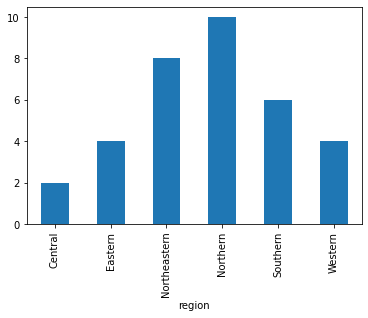

In [49]:
states_agg_df.total_states.plot.bar()

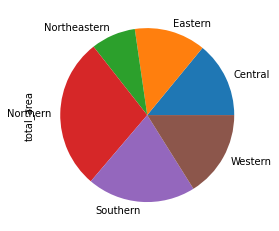

In [52]:
states_agg_df.total_area.plot.pie()

##  Create a subset of the dataframe such that it shows mean power generated on each of the days for all the sectors.

In [53]:
mean_df = power_df.groupby('date').mean()
mean_df.head()

,thermal_generation_actual,thermal_generation_estimated,nuclear_generation_actual,nuclear_generation_estimated,hydro_generation_actual,hydro_generation_estimated
date,,,,,,
2017-09-01,555.582,506.478,23.652,17.836,113.484,99.538
2017-09-02,555.582,512.674,23.652,18.456,113.484,99.128
2017-09-03,555.554,506.646,23.652,18.514,113.484,94.610
2017-09-04,555.554,542.856,23.652,18.524,113.484,100.072
2017-09-05,558.170,555.930,23.652,18.542,113.484,94.032


## Plotting a graph of mean of all the types of power gernerations in all of India, with total power generation

In [55]:
mean_df.columns[mean_df.columns.str.endswith('actual')]

Index(['thermal_generation_actual', 'nuclear_generation_actual',
       'hydro_generation_actual'],
      dtype='object')

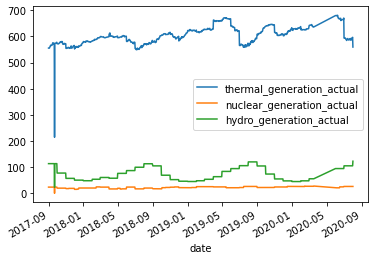

In [54]:
mean_df.loc[:,mean_df.columns[mean_df.columns.str.endswith('actual')]].plot.line()

## With data cleaning and some basic eda done, what other questions would would you like to get the answer for?

## Come up with atleat 3 such questions and find the anwers for the same individually before the session ends.

## Try forming as many questions and their answers later as per your availability and share your notebooks on slack.